## churn prediction

stop using services

Binary classification

**g(xi) = yi**

yi {0,1}, 

1 is chrun




## data preparation

- download data and read in pandas
- look at the data
- make column names and values look uniform
- check if the chrun variable needs preparation


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/telco-customer-churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
cols = list(df.columns)
cols_c = [str(c).lower().strip().replace(" ", "_") for c in cols]
cols_c

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [5]:
df.columns = cols_c
df.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               paymentmethod monthlycharges  totalcharges churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
df.head().T

0             1               2  \
customerid              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
seniorcitizen                    0             0               0   
partner                        Yes            No              No   
dependents                      No            No              No   
tenure                           1            34               2   
phoneservice                    No           Yes             Yes   
multiplelines     No phone service            No              No   
internetservice                DSL           DSL             DSL   
onlinesecurity                  No           Yes             Yes   
onlinebackup                   Yes            No             Yes   
deviceprotection                No           Yes              No   
techsupport                     No            No              No   
streamingtv                     No            No              No   
streamingmovies                 No            No              No   
contract            Month-to-month      One year  Month-to-month   
paperlessbilling               Yes            No             Yes   
paymentmethod     Electronic check  Mailed check    Mailed check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           No            No             Yes   

                                          3                 4  
customerid                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
seniorcitizen                             0                 0  
partner                                  No                No  
dependents                               No                No  
tenure                                   45                 2  
phoneservice                             No               Yes  
multiplelines              No phone service                No  
internetservice                         DSL       Fiber optic  
onlinesecurity                          Yes                No  
onlinebackup                             No                No  
deviceprotection                        Yes                No  
techsupport                             Yes                No  
streamingtv                              No                No  
streamingmovies                          No                No  
contract                           One year    Month-to-month  
paperlessbilling                         No               Yes  
paymentmethod     Bank transfer (automatic)  Electronic check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    No               Yes

In [7]:
list(df.dtypes[df.dtypes == 'object'].index)

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [8]:
# now we can convert the spaces between words in the categorical variblea
# change the space by _

categorical_vars = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_vars:
    df[c] = df[c].str.lower().str.strip().str.replace(r" |-","_")




<ipython-input-8-7551e34483f8>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[c] = df[c].str.lower().str.strip().str.replace(r" |-","_")


In [9]:
df.head().T

0             1               2  \
customerid              7590_vhveg    5575_gnvde      3668_qpybk   
gender                      female          male            male   
seniorcitizen                    0             0               0   
partner                        yes            no              no   
dependents                      no            no              no   
tenure                           1            34               2   
phoneservice                    no           yes             yes   
multiplelines     no_phone_service            no              no   
internetservice                dsl           dsl             dsl   
onlinesecurity                  no           yes             yes   
onlinebackup                   yes            no             yes   
deviceprotection                no           yes              no   
techsupport                     no            no              no   
streamingtv                     no            no              no   
streamingmovies                 no            no              no   
contract            month_to_month      one_year  month_to_month   
paperlessbilling               yes            no             yes   
paymentmethod     electronic_check  mailed_check    mailed_check   
monthlycharges               29.85         56.95           53.85   
totalcharges                 29.85        1889.5          108.15   
churn                           no            no             yes   

                                          3                 4  
customerid                       7795_cfocw        9237_hqitu  
gender                                 male            female  
seniorcitizen                             0                 0  
partner                                  no                no  
dependents                               no                no  
tenure                                   45                 2  
phoneservice                             no               yes  
multiplelines              no_phone_service                no  
internetservice                         dsl       fiber_optic  
onlinesecurity                          yes                no  
onlinebackup                             no                no  
deviceprotection                        yes                no  
techsupport                             yes                no  
streamingtv                              no                no  
streamingmovies                          no                no  
contract                           one_year    month_to_month  
paperlessbilling                         no               yes  
paymentmethod     bank_transfer_(automatic)  electronic_check  
monthlycharges                         42.3              70.7  
totalcharges                        1840.75            151.65  
churn                                    no               yes

In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

## new we want to convert the total charges pd_to_numeric()

In [11]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
df[tc.isnull()][['totalcharges', 'churn']]

totalcharges churn
488                  no
753                  no
936                  no
1082                 no
1340                 no
3331                 no
3826                 no
4380                 no
5218                 no
6670                 no
6754                 no

In [13]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [14]:
df[tc.isnull()][['totalcharges', 'churn']]

totalcharges churn
488            NaN    no
753            NaN    no
936            NaN    no
1082           NaN    no
1340           NaN    no
3331           NaN    no
3826           NaN    no
4380           NaN    no
5218           NaN    no
6670           NaN    no
6754           NaN    no

In [15]:
df.totalcharges = df.totalcharges.fillna(df.totalcharges.mean())

In [16]:
df.totalcharges.isnull().sum()

0

In [17]:
df.churn.isnull().sum()

0

In [18]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
df.churn = (df.churn == 'yes').astype(int)

In [20]:
df.churn.isnull().sum()

0

In [21]:
df.churn.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: churn, Length: 7043, dtype: bool

## setting up the validation framework


In [22]:
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
train_test_split?

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)



In [25]:
df_full_train.shape

(5634, 21)

In [26]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [27]:
df_full_train.churn.isnull().sum()

0

In [28]:
df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=1)



In [29]:
df_train.shape

(4225, 21)

## reset the indexes for the df

In [30]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)


In [31]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

## now we need to del the dependent variable from the datasets

In [32]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [33]:
df_full_train.reset_index(drop=True, inplace=True)

In [34]:
df_full_train.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442_pptjy    male              0     yes        yes      12          yes   
1  6261_rcvns  female              0      no         no      42          yes   
2  2176_osjuv    male              0     yes         no      71          yes   
3  6161_erdgd    male              0     yes        yes      71          yes   
4  2364_ufrom    male              0      no         no      30          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   
3           yes             dsl                  yes  ...   
4            no             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   
3                  yes                  yes                  yes   
4                   no                  yes                  yes   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   
3                  yes  one_year               no           electronic_check   
4                   no  one_year               no           electronic_check   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  
3          85.45       6300.85      0  
4          70.40       2044.75      0  

[5 rows x 21 columns]

In [35]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [36]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [37]:
round(df_full_train.churn.mean(),2)

0.27

## that is the churn rate is 27%


In [38]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [39]:
numerical_var = ['tenure', 'monthlycharges', 'totalcharges']

In [40]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [41]:
categorical_var = [ 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']



In [42]:
df_full_train[categorical_var].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

In [43]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female


0.27682403433476394

In [44]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [45]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner


0.20503330866025166

In [46]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner


0.3298090040927694

In [47]:
df_full_train.dependents.unique()


array(['yes', 'no'], dtype=object)

In [48]:
df_full_train[df_full_train.dependents == 'yes'].churn.mean()


0.16566626650660263

In [49]:
df_full_train.groupby('gender').churn.agg(['mean','count'])

mean  count
gender                 
female  0.276824   2796
male    0.263214   2838

## the following is to make it print the loop


In [50]:
from IPython.display import display

In [51]:
for c in categorical_var:
    
    print(c)
    df_group =  df_full_train.groupby(c).churn.agg(['mean','count'])

    df_group['diff'] = df_group['mean'] - df_full_train.churn.mean()

    df_group['risk'] = df_group['mean'] /  df_full_train.churn.mean()
    
    display(df_group)
    print()
    
    

gender


mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980


seniorcitizen


mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208


partner


mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472


dependents


mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651


phoneservice


mean  count      diff      risk
phoneservice                                     
no            0.241316    547 -0.028652  0.893870
yes           0.273049   5087  0.003081  1.011412


multiplelines


mean  count      diff      risk
multiplelines                                        
no                0.257407   2700 -0.012561  0.953474
no_phone_service  0.241316    547 -0.028652  0.893870
yes               0.290742   2387  0.020773  1.076948


internetservice


mean  count      diff      risk
internetservice                                     
dsl              0.192347   1934 -0.077621  0.712482
fiber_optic      0.425171   2479  0.155203  1.574895
no               0.077805   1221 -0.192163  0.288201


onlinesecurity


mean  count      diff      risk
onlinesecurity                                          
no                   0.420921   2801  0.150953  1.559152
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.153226   1612 -0.116742  0.567570


onlinebackup


mean  count      diff      risk
onlinebackup                                            
no                   0.404323   2498  0.134355  1.497672
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.217232   1915 -0.052736  0.804660


deviceprotection


mean  count      diff      risk
deviceprotection                                        
no                   0.395875   2473  0.125907  1.466379
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.230412   1940 -0.039556  0.853480


techsupport


mean  count      diff      risk
techsupport                                             
no                   0.418914   2781  0.148946  1.551717
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.159926   1632 -0.110042  0.592390


streamingtv


mean  count      diff      risk
streamingtv                                             
no                   0.342832   2246  0.072864  1.269897
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.302723   2167  0.032755  1.121328


streamingmovies


mean  count      diff      risk
streamingmovies                                         
no                   0.338906   2213  0.068938  1.255358
no_internet_service  0.077805   1221 -0.192163  0.288201
yes                  0.307273   2200  0.037305  1.138182


contract


mean  count      diff      risk
contract                                           
month_to_month  0.431701   3104  0.161733  1.599082
one_year        0.120573   1186 -0.149395  0.446621
two_year        0.028274   1344 -0.241694  0.104730


paperlessbilling


mean  count      diff      risk
paperlessbilling                                     
no                0.172071   2313 -0.097897  0.637375
yes               0.338151   3321  0.068183  1.252560


paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

## Feature importance: 

## 1 mutual info

In [52]:
from sklearn.metrics import mutual_info_score


In [53]:
mutual_info_score(df_full_train.churn, df_full_train.paymentmethod)

0.043210027531582915

In [54]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [55]:
mi = df_full_train[categorical_var].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 2 Correlation coefficient

In [1051]:
df_full_train[numerical_var].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.197365
dtype: float64

In [1052]:
df_full_train[numerical_var].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.197365
dtype: float64

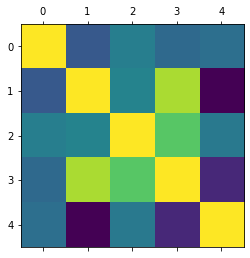

In [1053]:
import matplotlib.pyplot as plt

plt.matshow(df_full_train.corr())
plt.show()


<AxesSubplot:>

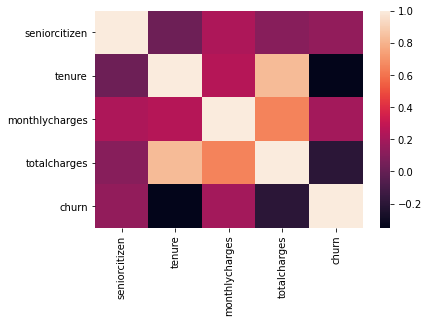

In [1054]:
import seaborn as sns
sns.heatmap(df_full_train.corr())

In [1055]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [1056]:
df_full_train[(df_full_train.tenure > 2) &(df_full_train.tenure <= 12)].churn.mean()



0.3994413407821229

# one hot encoding

In [1057]:
from sklearn.feature_extraction import DictVectorizer


In [1058]:

dicts = df_train[['gender', 'contract']].iloc[:20].to_dict(orient='records')



In [1059]:
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month_to_month'},
 {'gender': 'male', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'month_to_month'},
 {'gender': 'male', 'contract': 'month_to_month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month_to_month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'}]

In [1060]:
# this is used to not return a sparse matrix
dv = DictVectorizer(sparse=False)

In [1061]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [1062]:
dv.get_feature_names()

['contract=month_to_month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [1063]:
#it makes the one hot encoding
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [1064]:

full_dicts = df_train[categorical_var + numerical_var].to_dict(orient='records')

full_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [1065]:
# this is used to not return a sparse matrix
dv = DictVectorizer(sparse=False)

In [1066]:
dv.fit(full_dicts)

DictVectorizer(sparse=False)

In [1067]:
dv.get_feature_names()

['contract=month_to_month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [1068]:
X_train = dv.transform(full_dicts)

In [1069]:
full_dicts_val = df_val[categorical_var + numerical_var].to_dict(orient='records')


X_val = dv.transform(full_dicts_val)



In [1070]:
X_val[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 7.0850e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 4.9734e+03])

# Logistic regression

g(xi) = yi

classification can be 

binary. or multitype

yi {0, 1} 

In [1071]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [1072]:
z = np.linspace(-5,5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [1073]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

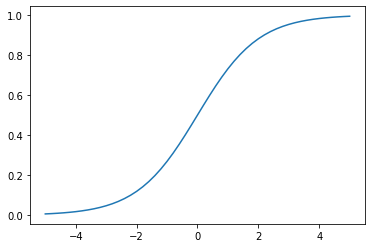

In [1074]:
plt.plot(z, sigmoid(z))

# training logistic regression

In [1075]:
from sklearn.linear_model import LogisticRegression

In [1076]:
model_logistic = LogisticRegression()

In [1077]:
model_logistic.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1078]:
# this are the weights W
model_logistic.coef_

array([[ 4.76020626e-01, -1.76609993e-01, -4.11083068e-01,
        -2.99609961e-02, -8.17114385e-02,  6.22466639e-02,
        -9.19298309e-02, -8.19892677e-02, -3.66580444e-02,
        -7.50143903e-02, -3.35745879e-01,  3.16003275e-01,
        -9.19298309e-02,  3.68063658e-03, -2.57256021e-01,
         1.36211016e-01,  9.37257030e-03,  6.09668823e-02,
        -9.19298309e-02, -8.07094862e-02,  2.63752345e-01,
        -9.19298309e-02, -2.83494949e-01, -2.31045326e-01,
         1.19372891e-01, -1.67143567e-01,  5.54711322e-02,
        -8.88897965e-02, -3.46773715e-02,  6.91357910e-02,
        -5.72410576e-02,  1.36211016e-01, -2.47883450e-01,
         2.13329118e-01, -1.22358582e-01, -9.19298309e-02,
         1.02615978e-01, -7.09188873e-02, -9.19298309e-02,
         5.11762835e-02,  2.10284758e-01, -9.19298309e-02,
        -2.30027362e-01, -6.90019397e-02,  3.71268948e-04]])

In [1079]:
# first batch of weights
model_logistic.coef_[0].round(3)

array([ 0.476, -0.177, -0.411, -0.03 , -0.082,  0.062, -0.092, -0.082,
       -0.037, -0.075, -0.336,  0.316, -0.092,  0.004, -0.257,  0.136,
        0.009,  0.061, -0.092, -0.081,  0.264, -0.092, -0.283, -0.231,
        0.119, -0.167,  0.055, -0.089, -0.035,  0.069, -0.057,  0.136,
       -0.248,  0.213, -0.122, -0.092,  0.103, -0.071, -0.092,  0.051,
        0.21 , -0.092, -0.23 , -0.069,  0.   ])

In [1080]:
# this is Wo
model_logistic.intercept_

array([-0.11308802])

In [1081]:
# this is called hard predictions because it already has the correct 
# or actual y
model_logistic.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [1082]:
# this are the predictions, we can see the probability of

model_logistic.predict_proba(X_train)

#          0.           1

array([[0.9053835 , 0.0946165 ],
       [0.32307386, 0.67692614],
       [0.36926673, 0.63073327],
       ...,
       [0.47127372, 0.52872628],
       [0.95775019, 0.04224981],
       [0.30500717, 0.69499283]])

In [1083]:
y_pred = model_logistic.predict_proba(X_val)[:,1]
y_pred

array([0.00922693, 0.20056027, 0.20871861, ..., 0.13676848, 0.79659512,
       0.8349255 ])

In [1084]:
churn_decision = (y_pred >= 0.5)

In [1085]:
df_val[churn_decision].customerid

3       8433_wxgna
8       3440_jpscl
12      7228_omtpn
19      6711_fldfb
24      2612_ranwt
           ...    
1397    5976_jcjrh
1398    2034_cgrhz
1399    5276_kqwhg
1407    6521_yytyi
1408    3049_solay
Name: customerid, Length: 308, dtype: object

In [1086]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [1087]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [1088]:
(y_val == churn_decision).mean()

0.8041163946061036

In [940]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [941]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

probability  prediction  actual  correct
0        0.009227           0       0     True
1        0.200560           0       0     True
2        0.208719           0       0     True
3        0.539362           1       1     True
4        0.209526           0       0     True
...           ...         ...     ...      ...
1404     0.313841           0       0     True
1405     0.039871           0       1    False
1406     0.136768           0       0     True
1407     0.796595           1       1     True
1408     0.834925           1       1     True

[1409 rows x 4 columns]

In [942]:
df_pred.correct.mean()

0.8041163946061036

# Model interpretation

In [943]:
dv.get_feature_names()

['contract=month_to_month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [944]:
model_logistic.coef_

array([[ 4.76020626e-01, -1.76609993e-01, -4.11083068e-01,
        -2.99609961e-02, -8.17114385e-02,  6.22466639e-02,
        -9.19298309e-02, -8.19892677e-02, -3.66580444e-02,
        -7.50143903e-02, -3.35745879e-01,  3.16003275e-01,
        -9.19298309e-02,  3.68063658e-03, -2.57256021e-01,
         1.36211016e-01,  9.37257030e-03,  6.09668823e-02,
        -9.19298309e-02, -8.07094862e-02,  2.63752345e-01,
        -9.19298309e-02, -2.83494949e-01, -2.31045326e-01,
         1.19372891e-01, -1.67143567e-01,  5.54711322e-02,
        -8.88897965e-02, -3.46773715e-02,  6.91357910e-02,
        -5.72410576e-02,  1.36211016e-01, -2.47883450e-01,
         2.13329118e-01, -1.22358582e-01, -9.19298309e-02,
         1.02615978e-01, -7.09188873e-02, -9.19298309e-02,
         5.11762835e-02,  2.10284758e-01, -9.19298309e-02,
        -2.30027362e-01, -6.90019397e-02,  3.71268948e-04]])

In [945]:

dict(zip(dv.get_feature_names(), model_logistic.coef_[0].round(3)))


{'contract=month_to_month': 0.476,
 'contract=one_year': -0.177,
 'contract=two_year': -0.411,
 'dependents=no': -0.03,
 'dependents=yes': -0.082,
 'deviceprotection=no': 0.062,
 'deviceprotection=no_internet_service': -0.092,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.037,
 'gender=male': -0.075,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.092,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.257,
 'multiplelines=no_phone_service': 0.136,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.061,
 'onlinebackup=no_internet_service': -0.092,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.264,
 'onlinesecurity=no_internet_service': -0.092,
 'onlinesecurity=yes': -0.283,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.119,
 'partner=no': -0.167,
 'partner=yes': 0.055,
 'paymentmethod=bank_transfer_(automatic)': -0.089,
 'paymentmethod=credit_card_(automatic)': -0.035,
 'paymentmethod=electronic_check': 0.069,


# now we want to train with a small set of 
# variables

In [946]:
small = ['contract','tenure','monthlycharges']

In [947]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month_to_month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month_to_month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month_to_month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month_to_month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month_to_month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month_to_month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month_to_month', 'tenure': 6, 'monthlycharges': 109.9}]

In [506]:

dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].iloc[:10].to_dict(orient='records')



In [507]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [508]:
dv_small.get_feature_names()

['contract=month_to_month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [509]:
X_train_small = dv_small.transform(dicts_train_small)

In [510]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [511]:
w0 = model_small.intercept_[0]
w0

-2.4767756640735334

In [512]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [513]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month_to_month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [514]:
sigmoid(-2.7 + 0.97 + (80*0.027) + (5*-0.036))

0.5621765008857981

# Using the model

In [948]:

dicts_full_train = df_full_train[categorical_var+numerical_var].to_dict(orient='records')




In [949]:
dicts_full_train[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 12,
 'monthlycharges': 19.7,
 'totalcharges': 258.35}

In [950]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [951]:
y_full_train = df_full_train.churn.values

In [952]:
model_full = LogisticRegression().fit(X_full_train, y_full_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [953]:

dicts_test = df_test[categorical_var+numerical_var].to_dict(orient='records')




In [954]:
X_test = dv.transform(dicts_test)

In [955]:
y_pred = model_full.predict_proba(X_test)[:,1]

In [956]:
churn_decision = (y_pred >= 0.5)

In [957]:
(churn_decision == y_test).mean()

0.8147622427253371

In [958]:
w = model_full.coef_[0]
w.round(3)

array([ 0.27 , -0.146, -0.248,  0.015, -0.139,  0.059, -0.095, -0.088,
       -0.052, -0.072, -0.285,  0.256, -0.095,  0.005, -0.211,  0.034,
        0.052,  0.082, -0.095, -0.112,  0.212, -0.095, -0.241, -0.249,
        0.125, -0.074, -0.05 , -0.083, -0.101,  0.237, -0.178,  0.034,
       -0.158,  0.168, -0.095, -0.095,  0.065, -0.057, -0.095,  0.028,
        0.225, -0.095, -0.254, -0.066,  0.   ])

In [959]:
dict(zip(dv.get_feature_names(), w.round(3)))

{'contract=month_to_month': 0.27,
 'contract=one_year': -0.146,
 'contract=two_year': -0.248,
 'dependents=no': 0.015,
 'dependents=yes': -0.139,
 'deviceprotection=no': 0.059,
 'deviceprotection=no_internet_service': -0.095,
 'deviceprotection=yes': -0.088,
 'gender=female': -0.052,
 'gender=male': -0.072,
 'internetservice=dsl': -0.285,
 'internetservice=fiber_optic': 0.256,
 'internetservice=no': -0.095,
 'monthlycharges': 0.005,
 'multiplelines=no': -0.211,
 'multiplelines=no_phone_service': 0.034,
 'multiplelines=yes': 0.052,
 'onlinebackup=no': 0.082,
 'onlinebackup=no_internet_service': -0.095,
 'onlinebackup=yes': -0.112,
 'onlinesecurity=no': 0.212,
 'onlinesecurity=no_internet_service': -0.095,
 'onlinesecurity=yes': -0.241,
 'paperlessbilling=no': -0.249,
 'paperlessbilling=yes': 0.125,
 'partner=no': -0.074,
 'partner=yes': -0.05,
 'paymentmethod=bank_transfer_(automatic)': -0.083,
 'paymentmethod=credit_card_(automatic)': -0.101,
 'paymentmethod=electronic_check': 0.237,
 

In [838]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month_to_month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [839]:
X_customer = dv.transform([customer])

In [840]:
model_full.predict_proba(X_customer)[0,1]

0.4205165678636581

In [841]:
y_test[10]

0

In [842]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month_to_month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [843]:
X_customer = dv.transform([customer])
model_full.predict_proba(X_customer)[0,1]

0.6139349000068299

In [844]:
y_test[-1]

1

# EVALUATION

## Accuracy

In [1089]:
len(y_val)

1409

In [1090]:
(y_val == churn_decision).mean()

0.8041163946061036

In [1091]:
(y_val == churn_decision).mean()

0.8041163946061036

In [1092]:
threshold =np.linspace(0,1, 12)


scores = []
for t in threshold:
    churn_decisions = (y_pred >= t)
    score = (y_val == churn_decisions).mean()
    print(r'%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.09 0.578
0.18 0.698
0.27 0.750
0.36 0.773
0.45 0.796
0.55 0.802
0.64 0.789
0.73 0.754
0.82 0.730
0.91 0.726
1.00 0.726


In [1093]:
scores

[0.2739531582682754,
 0.5777146912704045,
 0.6983676366217175,
 0.7501774308019872,
 0.772888573456352,
 0.7963094393186657,
 0.8019872249822569,
 0.7892122072391767,
 0.7537260468417317,
 0.7295954577714692,
 0.7260468417317246,
 0.7260468417317246]

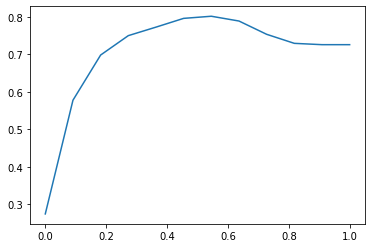

In [1094]:
plt.plot(threshold, scores)

In [1095]:
from sklearn.metrics import accuracy_score

In [1096]:
accuracy_score(y_val, churn_decision)

0.8041163946061036

In [1097]:
threshold =np.linspace(0,1, 12)


scores = []
for t in threshold:
    score = accuracy_score(y_val, (y_pred>=t))
    print(r'%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.09 0.578
0.18 0.698
0.27 0.750
0.36 0.773
0.45 0.796
0.55 0.802
0.64 0.789
0.73 0.754
0.82 0.730
0.91 0.726
1.00 0.726


In [1098]:
# to count values
from collections import Counter

In [1099]:
Counter(y_pred>=0.5)

Counter({False: 1101, True: 308})

In [1100]:
Counter(y_val)

Counter({0: 1023, 1: 386})

# confusion matrix

In [1101]:
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)

t = 0.5
predicted_positive = y_pred >= t
predicted_negative = y_pred < t


In [1102]:
tp = (predicted_positive & actual_positive).sum()
tn = (predicted_negative & actual_negative).sum()

In [1103]:
print(tp)
print(tn)

209
924


In [1104]:
fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()

In [1105]:
print(fp)
print(fn)

99
177


In [1106]:
confusion_matrix = np.array([
    [tp, fp],
    [fn, tn]
])

In [1107]:
confusion_matrix

array([[209,  99],
       [177, 924]])

In [1108]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.15, 0.07],
       [0.13, 0.66]])

# ROC Curves


In [1109]:
tpr = tp / (tp + fn)
tpr

0.5414507772020726

In [1110]:
fpr = fp /(fp+tn)
fpr

0.0967741935483871

## we want evaluate this for each threshold

In [1113]:
threshold = np.linspace(0,1, 101)

scores = []

for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, tn, fn))

In [1114]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 917, 106, 1),
 (0.02, 384, 831, 192, 2),
 (0.03, 383, 766, 257, 3),
 (0.04, 381, 716, 307, 5),
 (0.05, 379, 686, 337, 7),
 (0.06, 377, 660, 363, 9),
 (0.07, 373, 641, 382, 13),
 (0.08, 371, 612, 411, 15),
 (0.09, 369, 580, 443, 17),
 (0.1, 366, 554, 469, 20),
 (0.11, 365, 530, 493, 21),
 (0.12, 365, 509, 514, 21),
 (0.13, 360, 477, 546, 26),
 (0.14, 355, 455, 568, 31),
 (0.15, 351, 436, 587, 35),
 (0.16, 347, 421, 602, 39),
 (0.17, 346, 403, 620, 40),
 (0.18, 344, 386, 637, 42),
 (0.19, 338, 373, 650, 48),
 (0.2, 333, 356, 667, 53),
 (0.21, 327, 336, 687, 59),
 (0.22, 323, 324, 699, 63),
 (0.23, 319, 315, 708, 67),
 (0.24, 314, 305, 718, 72),
 (0.25, 308, 294, 729, 78),
 (0.26, 303, 282, 741, 83),
 (0.27, 301, 269, 754, 85),
 (0.28, 297, 256, 767, 89),
 (0.29, 289, 245, 778, 97),
 (0.3, 283, 236, 787, 103),
 (0.31, 280, 230, 793, 106),
 (0.32, 278, 226, 797, 108),
 (0.33, 276, 221, 802, 110),
 (0.34, 274, 212, 811, 112),
 (0.35000000000000003, 270,

In [1115]:
cols = ['threshold', "tp", "fp", "tn", "fn"]
df_scores = pd.DataFrame(scores, columns=cols)
df_scores

threshold   tp    fp    tn   fn
0         0.00  386  1023     0    0
1         0.01  385   917   106    1
2         0.02  384   831   192    2
3         0.03  383   766   257    3
4         0.04  381   716   307    5
..         ...  ...   ...   ...  ...
96        0.96    0     0  1023  386
97        0.97    0     0  1023  386
98        0.98    0     0  1023  386
99        0.99    0     0  1023  386
100       1.00    0     0  1023  386

[101 rows x 5 columns]

In [1116]:
df_scores[::10]

threshold   tp    fp    tn   fn
0          0.0  386  1023     0    0
10         0.1  366   554   469   20
20         0.2  333   356   667   53
30         0.3  283   236   787  103
40         0.4  249   166   857  137
50         0.5  209    99   924  177
60         0.6  149    52   971  237
70         0.7   73    18  1005  313
80         0.8    9     1  1022  377
90         0.9    0     0  1023  386
100        1.0    0     0  1023  386

In [1117]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [1118]:
df_scores[::10]

threshold   tp    fp    tn   fn       tpr       fpr
0          0.0  386  1023     0    0  1.000000  1.000000
10         0.1  366   554   469   20  0.948187  0.541544
20         0.2  333   356   667   53  0.862694  0.347996
30         0.3  283   236   787  103  0.733161  0.230694
40         0.4  249   166   857  137  0.645078  0.162268
50         0.5  209    99   924  177  0.541451  0.096774
60         0.6  149    52   971  237  0.386010  0.050831
70         0.7   73    18  1005  313  0.189119  0.017595
80         0.8    9     1  1022  377  0.023316  0.000978
90         0.9    0     0  1023  386  0.000000  0.000000
100        1.0    0     0  1023  386  0.000000  0.000000

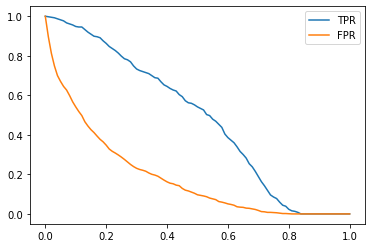

In [1121]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

# Random model

In [1123]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [1124]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [1126]:
def tpr_fpr_df(y_val, y_pred):
    scores = []
    
    for t in threshold:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, tn, fn))
    
    cols = ['threshold', "tp", "fp", "tn", "fn"]
    
    df_scores = pd.DataFrame(scores, columns=cols)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [1130]:
df_rand = tpr_fpr_df(y_val, y_rand)
df_rand[::10]

threshold   tp    fp    tn   fn       tpr       fpr
0          0.0  386  1023     0    0  1.000000  1.000000
10         0.1  347   923   100   39  0.898964  0.902248
20         0.2  307   822   201   79  0.795337  0.803519
30         0.3  276   724   299  110  0.715026  0.707722
40         0.4  237   624   399  149  0.613990  0.609971
50         0.5  202   518   505  184  0.523316  0.506354
60         0.6  161   409   614  225  0.417098  0.399804
70         0.7  121   302   721  265  0.313472  0.295210
80         0.8   78   206   817  308  0.202073  0.201369
90         0.9   40   101   922  346  0.103627  0.098729
100        1.0    0     0  1023  386  0.000000  0.000000

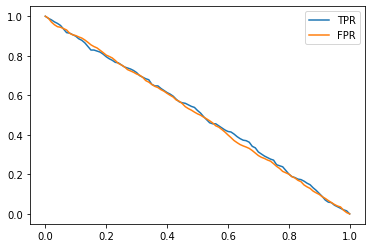

In [1131]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

# Ideal model

In [1132]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos

(1023, 386)

In [1133]:
y_ideal = np.repeat([0,1],[num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [1138]:
y_ideal_pred = np.linspace(0,1, len(y_val))

In [1141]:
1- y_val.mean()

0.7260468417317246

In [1142]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [1143]:
df_ideal = tpr_fpr_df(y_ideal, y_ideal_pred)
df_ideal[::10]

threshold   tp    fp    tn   fn       tpr       fpr
0          0.0  386  1023     0    0  1.000000  1.000000
10         0.1  386   882   141    0  1.000000  0.862170
20         0.2  386   741   282    0  1.000000  0.724340
30         0.3  386   600   423    0  1.000000  0.586510
40         0.4  386   459   564    0  1.000000  0.448680
50         0.5  386   319   704    0  1.000000  0.311828
60         0.6  386   178   845    0  1.000000  0.173998
70         0.7  386    37   986    0  1.000000  0.036168
80         0.8  282     0  1023  104  0.730570  0.000000
90         0.9  141     0  1023  245  0.365285  0.000000
100        1.0    1     0  1023  385  0.002591  0.000000

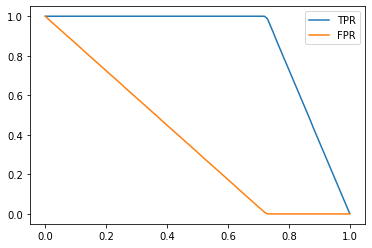

In [1144]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

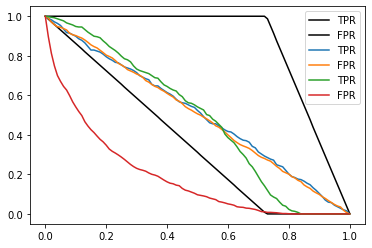

In [1146]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR', color='black')

plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')

plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')

plt.legend()

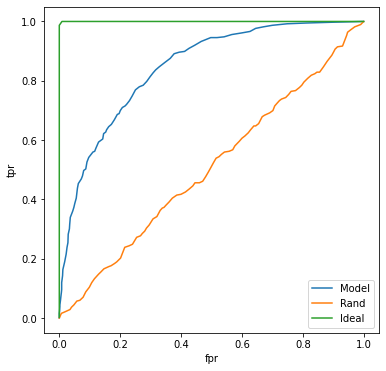

In [1154]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Rand')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.xlabel('fpr')
plt.ylabel('tpr')

plt.legend()

We want that our model graph ge close to the ideal and not close to the random line

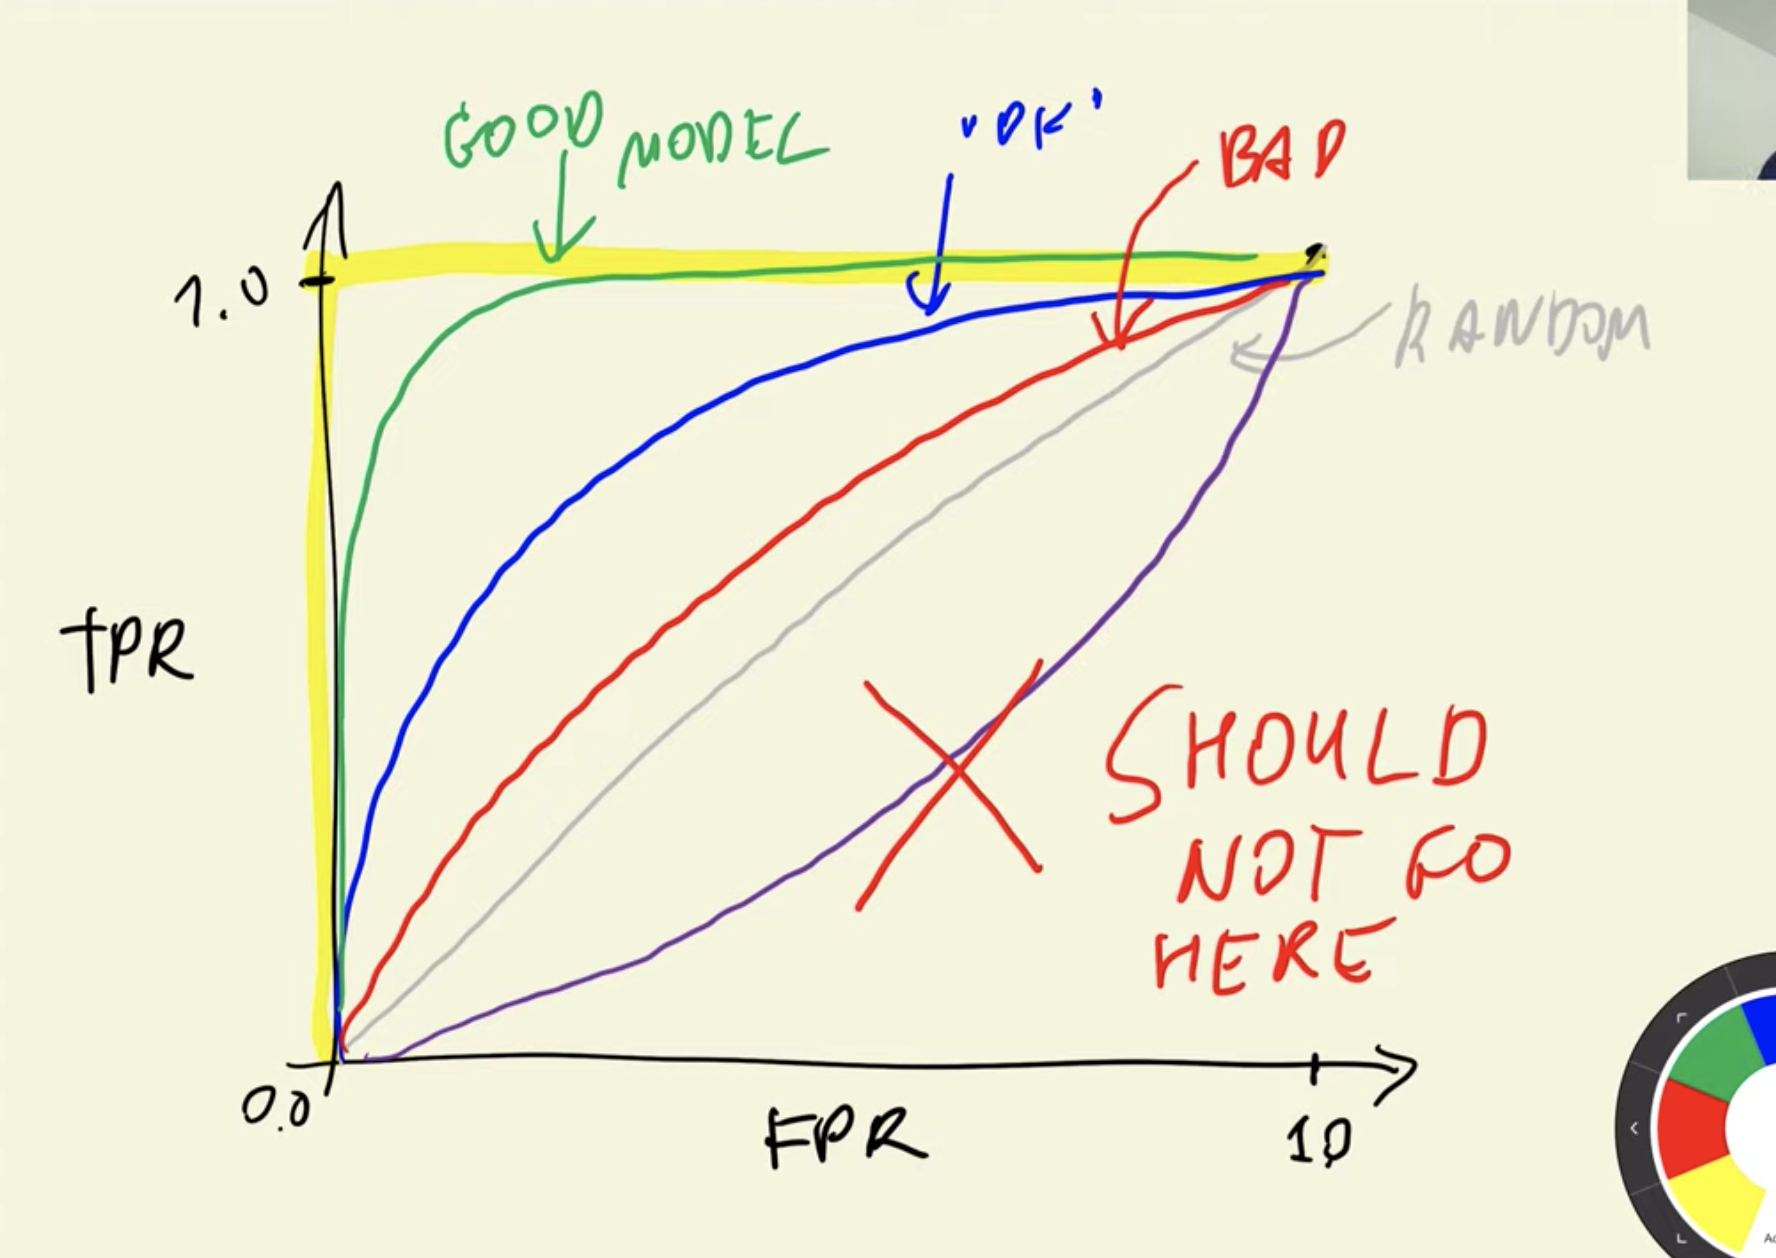

In [1155]:
from sklearn.metrics import roc_curve

In [1156]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

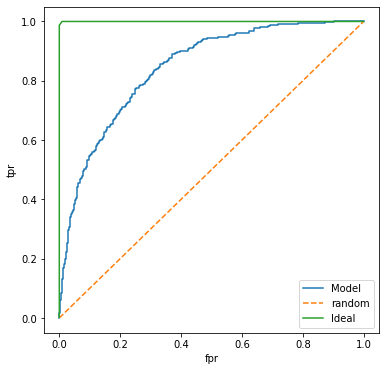

In [1159]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label='Model')
#plt.plot(df_rand.fpr, df_rand.tpr, label='Rand')
plt.plot([0,1],[0,1], label='random', linestyle='--')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.xlabel('fpr')
plt.ylabel('tpr')

plt.legend()

# Area under ROC

In [1162]:
from sklearn.metrics import auc, roc_auc_score

In [1161]:
# this compute the area under the curve
auc(fpr, tpr)

0.8436833654951655

In [1163]:
roc_auc_score(y_val, y_pred)

0.8436833654951655

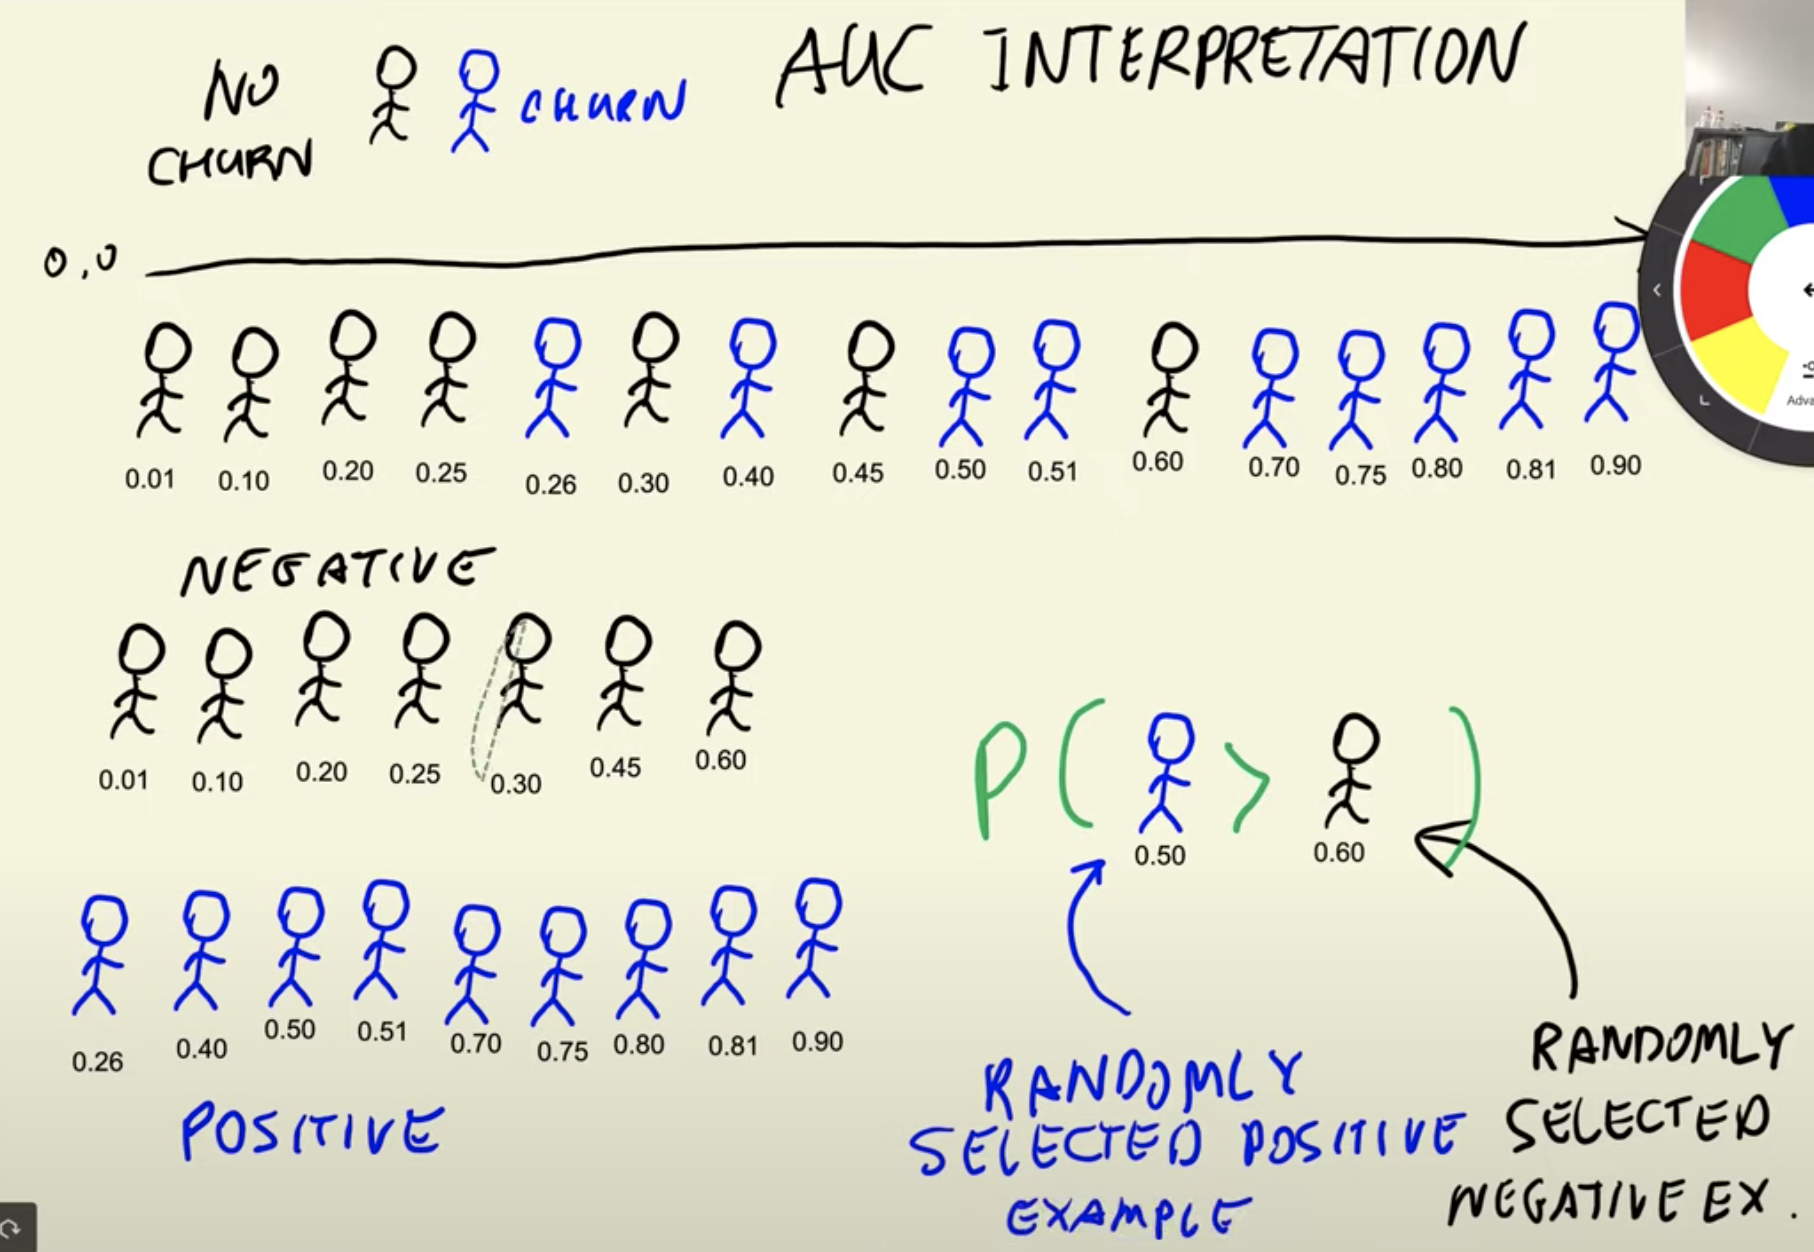

# Cross validation

## parameter tuning

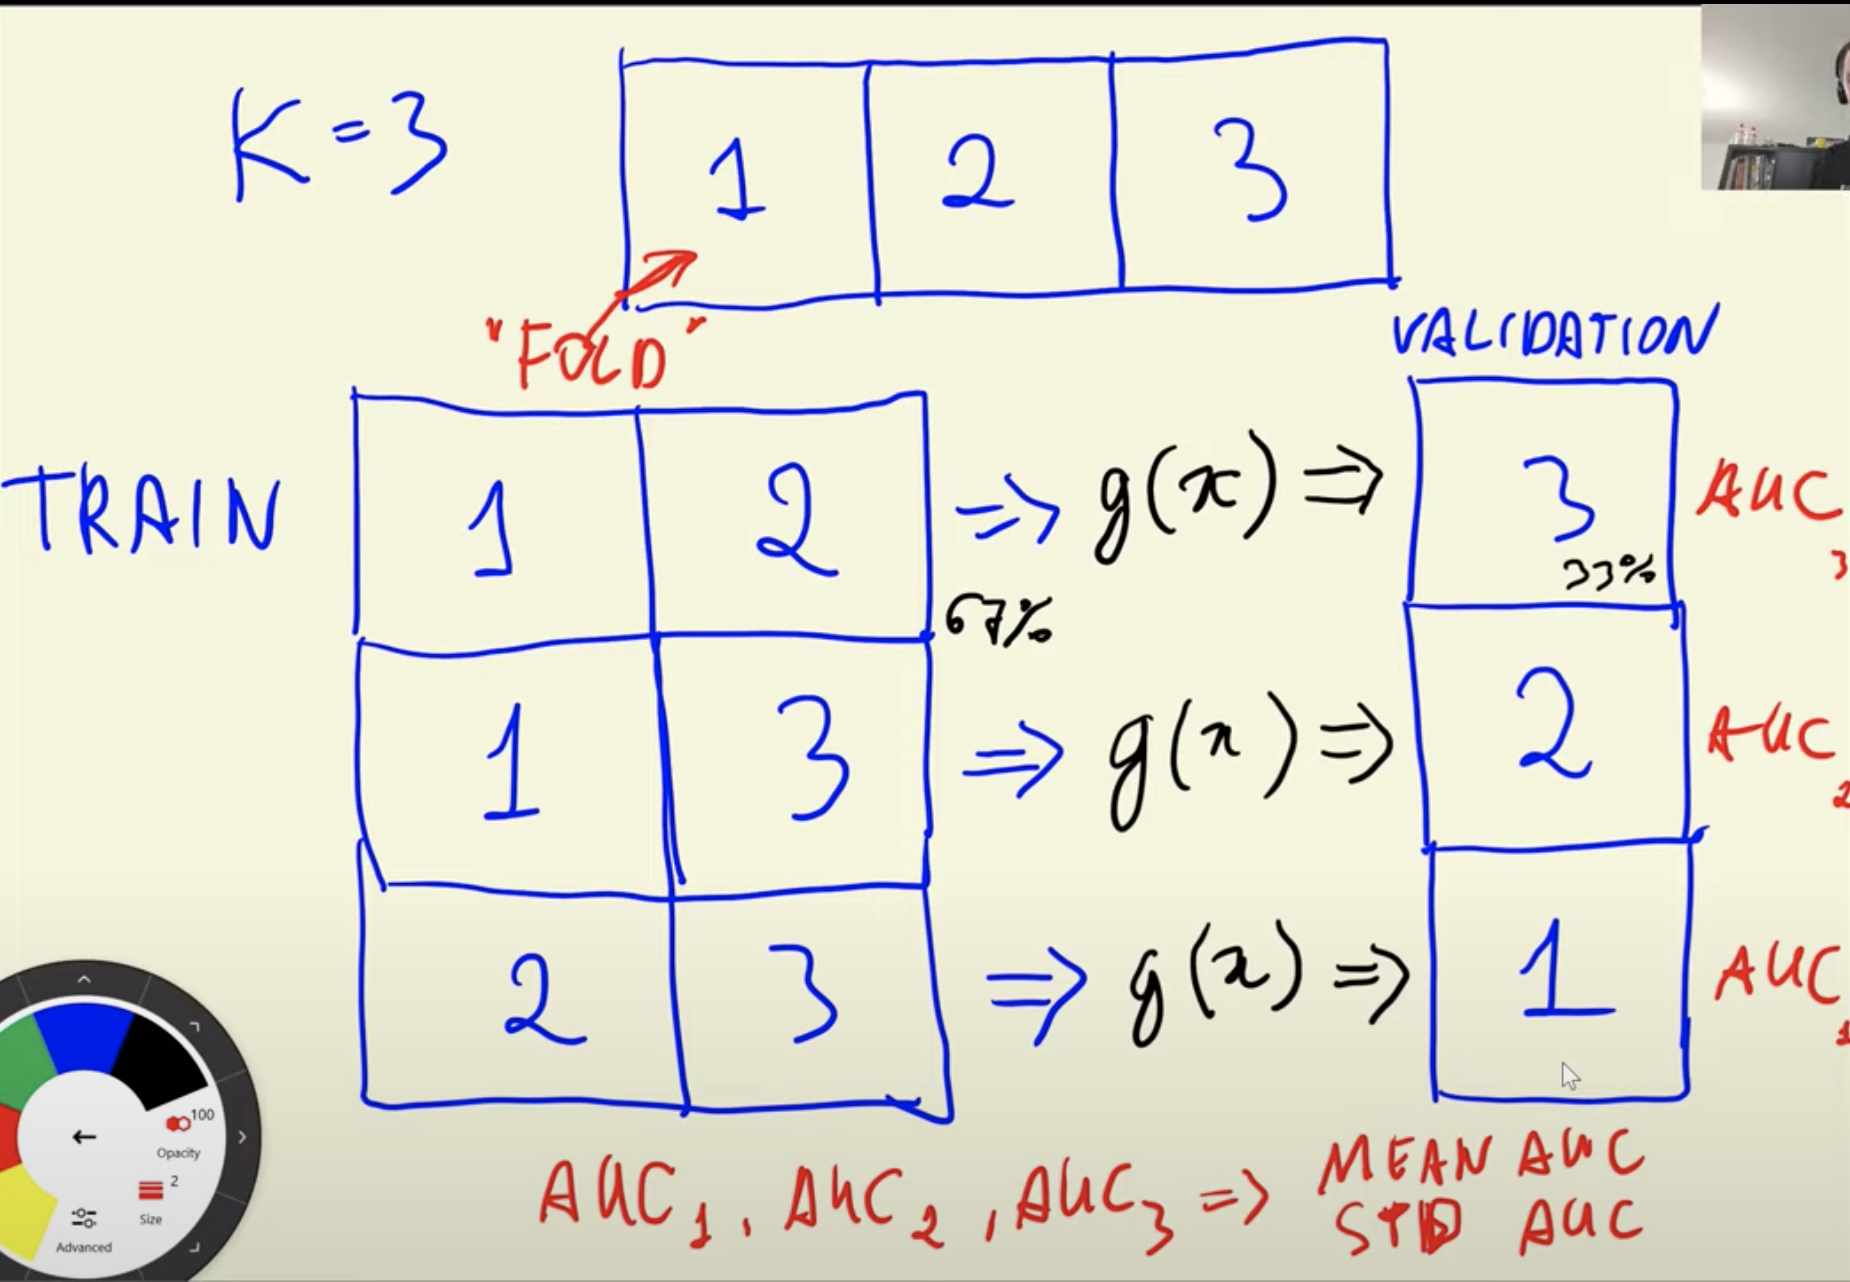

In [1200]:
def  train(df, y_train, C=1.0):
    dicts = df[categorical_var + numerical_var].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model
    
    
    
    

In [1208]:
dv, model = train(df_train, y_train, C=0.001 )


In [1209]:
def predict(df, dv, model):
    dicts = df[categorical_var+numerical_var].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred
    

In [1210]:
predict(df_val, dv, model)

array([0.17124537, 0.01220612, 0.66750525, 0.13827399, 0.56264108,
       0.44362362, 0.31686141, 0.35699613, 0.0062335 , 0.09120244,
       0.04571496, 0.02293986, 0.38887877, 0.71643654, 0.44310736,
       0.17504292, 0.46893516, 0.2822374 , 0.34473109, 0.07568924,
       0.71491414, 0.06389321, 0.00628602, 0.69351534, 0.72193379,
       0.1070333 , 0.6715953 , 0.10407804, 0.60225943, 0.00989015,
       0.0625285 , 0.01747004, 0.27385746, 0.53427104, 0.30014363,
       0.15173384, 0.47221387, 0.27327083, 0.77903138, 0.77186983,
       0.27425626, 0.31692335, 0.63036685, 0.03511366, 0.00513173,
       0.54753274, 0.48994064, 0.44182868, 0.08541885, 0.51829356,
       0.01815599, 0.03280424, 0.45302713, 0.40495127, 0.20995638,
       0.12563106, 0.01183049, 0.41274909, 0.03859784, 0.00869214,
       0.04080202, 0.74131942, 0.40127203, 0.08804217, 0.62951828,
       0.0834199 , 0.73809468, 0.09995958, 0.19451655, 0.03853699,
       0.32663662, 0.42754671, 0.30373467, 0.33046377, 0.66713

In [1215]:
from sklearn.model_selection import KFold

In [1216]:
kFold = KFold(n_splits=10, shuffle=True, random_state=1)

In [1222]:
!pip install tqdm
from tqdm.auto import tqdm


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [1227]:
n_splits = 5

for C in [0.1, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:

    scores = []

    for train_idx, val_idx in tqdm(kFold.split(df_full_train), total=n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
        print('C=%s %.3f +- %.3f' %(C, np.mean(scores), np.std(scores)))
        

  0%|          | 0/5 [00:00<?, ?it/s]

C=0.1 0.848 +- 0.000
C=0.1 0.845 +- 0.003
C=0.1 0.850 +- 0.007
C=0.1 0.846 +- 0.010
C=0.1 0.842 +- 0.012
C=0.1 0.841 +- 0.011
C=0.1 0.841 +- 0.010
C=0.1 0.838 +- 0.011
C=0.1 0.839 +- 0.011
C=0.1 0.841 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.0001 0.802 +- 0.000
C=0.0001 0.810 +- 0.007
C=0.0001 0.815 +- 0.010
C=0.0001 0.814 +- 0.008
C=0.0001 0.809 +- 0.013
C=0.0001 0.808 +- 0.012
C=0.0001 0.810 +- 0.011
C=0.0001 0.808 +- 0.011
C=0.0001 0.809 +- 0.011
C=0.0001 0.811 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.001 0.823 +- 0.000
C=0.001 0.826 +- 0.003
C=0.001 0.832 +- 0.008
C=0.001 0.830 +- 0.007
C=0.001 0.825 +- 0.012
C=0.001 0.824 +- 0.011
C=0.001 0.825 +- 0.010
C=0.001 0.823 +- 0.011
C=0.001 0.824 +- 0.011
C=0.001 0.826 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.01 0.844 +- 0.000
C=0.01 0.843 +- 0.001
C=0.01 0.847 +- 0.006
C=0.01 0.844 +- 0.007
C=0.01 0.840 +- 0.010
C=0.01 0.839 +- 0.010
C=0.01 0.840 +- 0.009
C=0.01 0.837 +- 0.010
C=0.01 0.838 +- 0.010
C=0.01 0.840 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.1 0.848 +- 0.000
C=0.1 0.845 +- 0.003
C=0.1 0.850 +- 0.007
C=0.1 0.846 +- 0.010
C=0.1 0.842 +- 0.012
C=0.1 0.841 +- 0.011
C=0.1 0.841 +- 0.010
C=0.1 0.838 +- 0.011
C=0.1 0.839 +- 0.011
C=0.1 0.841 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=1 0.847 +- 0.000
C=1 0.844 +- 0.003
C=1 0.848 +- 0.006
C=1 0.844 +- 0.008
C=1 0.840 +- 0.011
C=1 0.840 +- 0.010
C=1 0.840 +- 0.009
C=1 0.837 +- 0.011
C=1 0.838 +- 0.011
C=1 0.841 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=10 0.848 +- 0.000
C=10 0.844 +- 0.004
C=10 0.848 +- 0.006
C=10 0.845 +- 0.008
C=10 0.840 +- 0.012
C=10 0.840 +- 0.011
C=10 0.840 +- 0.010
C=10 0.838 +- 0.011
C=10 0.839 +- 0.011
C=10 0.841 +- 0.012


  0%|          | 0/5 [00:00<?, ?it/s]

C=100 0.847 +- 0.000
C=100 0.844 +- 0.003
C=100 0.848 +- 0.006
C=100 0.845 +- 0.007
C=100 0.840 +- 0.011
C=100 0.841 +- 0.010
C=100 0.841 +- 0.009
C=100 0.838 +- 0.011
C=100 0.839 +- 0.010
C=100 0.841 +- 0.011


In [1225]:
print('%.3f +- %.3f' %(np.mean(scores), np.std(scores)))

0.841 +- 0.011


In [1194]:
len(df_full_train
   )

5634

In [1230]:
scores

[0.8468743539589395,
 0.8408570544554456,
 0.8556384233343853,
 0.8363179985186404,
 0.8225496277915633,
 0.8412753912753913,
 0.8406870726147835,
 0.8229522454142948,
 0.8450274195938936,
 0.8593156532553528]

In [1229]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1)

y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)

auc

0.8566915293531367